In [1]:
import json
import random
from tqdm import tqdm

# ✅ 파일 경로
koalpaca_path = "../data/processed/koalpaca_chat_format.jsonl"
kakao_path = "../data/processed/kakao_chat_format.jsonl"

# ✅ 데이터 불러오기 함수
def load_jsonl(path):
    with open(path, "r", encoding="utf-8") as f:
        return [json.loads(line) for line in f.readlines()]

koalpaca_data = load_jsonl(koalpaca_path)
kakao_data = load_jsonl(kakao_path)

print(f"📦 KoAlpaca 샘플 개수: {len(koalpaca_data)}")
print(f"📦 Kakao 샘플 개수: {len(kakao_data)}")

📦 KoAlpaca 샘플 개수: 21155
📦 Kakao 샘플 개수: 88985


In [7]:
merged_data = koalpaca_data + kakao_data

random.seed(42)
random.shuffle(merged_data)

print(f"전체 데이터 수: {len(merged_data)}")

전체 데이터 수: 110140


In [9]:
# ✅ 90% train, 10% validation
split_idx = int(len(merged_data) * 0.9)
train_data = merged_data[:split_idx]
val_data = merged_data[split_idx:]

print(f"✅ 학습 데이터 수: {len(train_data)}")
print(f"✅ 검증 데이터 수: {len(val_data)}")

# ✅ 저장 디렉토리 생성
import os
os.makedirs("../data/final", exist_ok=True)

# ✅ jsonl 저장 함수
def save_jsonl(data, path):
    with open(path, "w", encoding="utf-8") as f:
        for item in data:
            f.write(json.dumps(item, ensure_ascii=False) + "\n")

# ✅ 저장 실행
save_jsonl(train_data, "../data/final/train.jsonl")
save_jsonl(val_data, "../data/final/val.jsonl")

✅ 학습 데이터 수: 99126
✅ 검증 데이터 수: 11014


In [11]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 학습 데이터 로딩
with open("../data/final/train.jsonl", "r", encoding="utf-8") as f:
    lines = [json.loads(line) for line in f]

# ✅ 데이터프레임으로 변환
records = []
for item in lines:
    user_msg = next(msg["content"] for msg in item["messages"] if msg["role"] == "user")
    assistant_msg = next(msg["content"] for msg in item["messages"] if msg["role"] == "assistant")
    records.append({
        "input_length": len(user_msg),
        "output_length": len(assistant_msg),
        "input_sentences": user_msg.count(".") + user_msg.count("?") + user_msg.count("!") + user_msg.count("ㅋ"),
        "output_sentences": assistant_msg.count(".") + assistant_msg.count("?") + assistant_msg.count("!") + assistant_msg.count("ㅋ")
    })

df = pd.DataFrame(records)

In [27]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 학습 데이터 로딩
with open("../data/final/val.jsonl", "r", encoding="utf-8") as f:
    lines = [json.loads(line) for line in f]

# ✅ 데이터프레임으로 변환
records = []
for item in lines:
    user_msg = next(msg["content"] for msg in item["messages"] if msg["role"] == "user")
    assistant_msg = next(msg["content"] for msg in item["messages"] if msg["role"] == "assistant")
    records.append({
        "input_length": len(user_msg),
        "output_length": len(assistant_msg),
        "input_sentences": user_msg.count(".") + user_msg.count("?") + user_msg.count("!") + user_msg.count("ㅋ"),
        "output_sentences": assistant_msg.count(".") + assistant_msg.count("?") + assistant_msg.count("!") + assistant_msg.count("ㅋ")
    })

df = pd.DataFrame(records)

In [29]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ✅ 윈도우 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

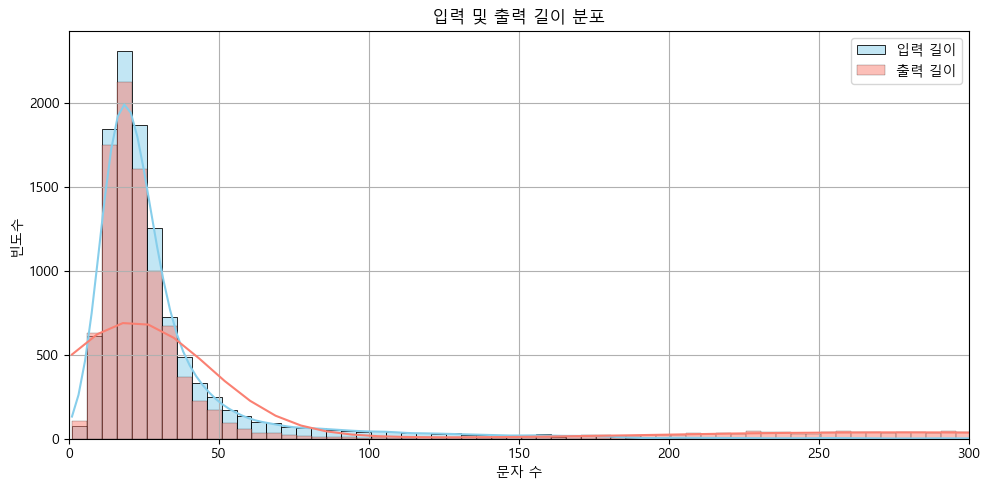

In [31]:
plt.figure(figsize=(10, 5))
sns.histplot(df["input_length"], color="skyblue", label="입력 길이", kde=True, binwidth=5)
sns.histplot(df["output_length"], color="salmon", label="출력 길이", kde=True, binwidth=5)
plt.xlim(0, 300) 
plt.legend()
plt.title("입력 및 출력 길이 분포")
plt.xlabel("문자 수")
plt.ylabel("빈도수")
plt.grid(True)
plt.tight_layout()
plt.show()

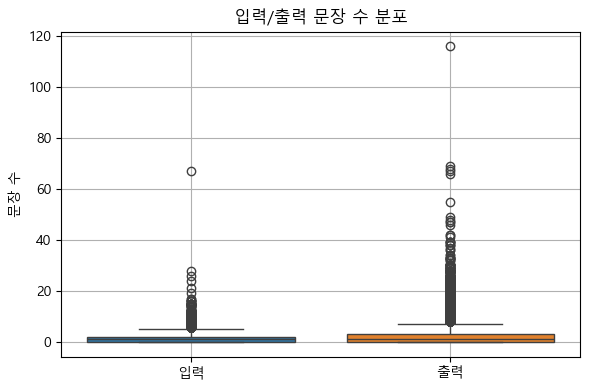

In [23]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df[["input_sentences", "output_sentences"]])
plt.title("입력/출력 문장 수 분포")
plt.ylabel("문장 수")
plt.xticks([0, 1], ["입력", "출력"])
plt.grid(True)
plt.tight_layout()
plt.show()

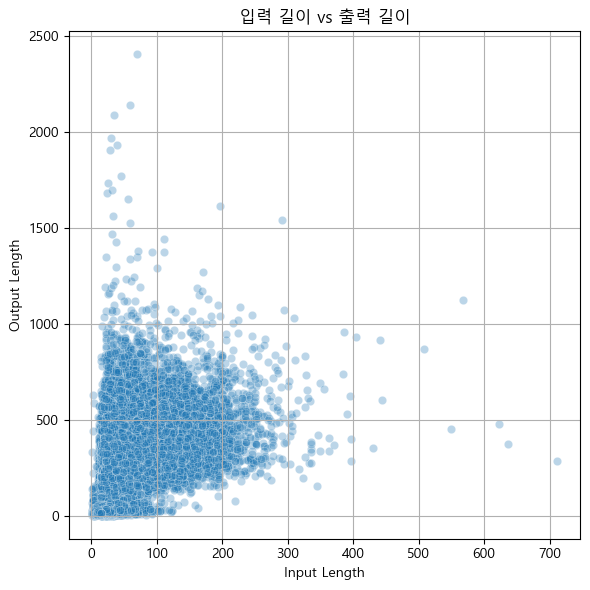

In [25]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x="input_length", y="output_length", data=df, alpha=0.3)
plt.title("입력 길이 vs 출력 길이")
plt.xlabel("Input Length")
plt.ylabel("Output Length")
plt.grid(True)
plt.tight_layout()
plt.show()